In [64]:
import pandas as pd
df = pd.read_csv(r'C:\Users\milan\Documents\clean_df.csv')

In [65]:
df.head()

,open_to_submit_min,submit_to_approve_min,channel_combined,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,event_total,session_pageload_total,url_uniq,device,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,bind
0,6,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.454665,0.424481,0.256619,251.00,-151.67,-0.604263,4832.04,206.951929,37.665251,0
1,5,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.381739,0.432331,0.534346,30.50,-9.33,-0.305902,477.96,1464.557704,110.155662,1
2,8,1,0.47824,0,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.454665,0.432331,0.534346,19.75,-5.42,-0.274430,302.04,1655.409879,127.744670,1
3,4,1,0.47824,1,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.370102,0.424481,0.436973,84.75,0.00,0.000000,1017.00,737.463127,54.277286,0
4,2,1,0.47824,3,0,1.82859,16.986182,15.882392,10.236375,0.471306,...,0.370102,0.432331,0.436973,50.33,-32.09,-0.637592,989.04,707.757017,79.737928,0


In [66]:
df.shape

(41578, 40)

In [67]:
df.isnull().sum()

open_to_submit_min                     0
submit_to_approve_min                  0
channel_combined                       0
pre_approval_interactions              0
post_approval_pre_bind_interactions    0
sessions_uniq                          0
event_total                            0
session_pageload_total                 0
url_uniq                               0
device                                 0
device_name                            0
avg_seconds_per_session                0
avg_events_per_session                 0
gender                                 0
tb                                     0
current_ins                            0
rx_result                              0
employment_status                      0
postal_code_address                    0
income_payment_period                  0
alcohol_weekly                         0
disability_pmts                        0
lrc_score                              0
previous_declined                      0
med_conditions_c

In [68]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)

train, test = train_test_split(df, test_size = 0.2)
train.head()

,open_to_submit_min,submit_to_approve_min,channel_combined,pre_approval_interactions,post_approval_pre_bind_interactions,sessions_uniq,event_total,session_pageload_total,url_uniq,device,...,product,quoted_risk_class,approved_risk_class,quoted_premium,premium_difference,premium_pct_diff,annual_approved_premium,face_prem_ratio,income_prem_ratio,bind
19799,4,1,0.355078,0,0,3.0,22.0,21.0,13.0,0.357847,...,0.466635,0.432331,0.256619,20.75,-23.42,-1.128675,530.04,188.665006,40.468644,1
34800,2,2,0.540130,0,0,1.0,22.0,26.0,14.0,0.357847,...,0.375910,0.432331,0.534346,18.25,-3.17,-0.173699,257.04,194.522253,186.741363,1
4017,4,1,0.271952,0,0,3.0,21.0,19.0,9.0,0.357847,...,0.454665,0.391531,0.256619,334.33,0.00,0.000000,4011.96,249.254728,17.511391,0
20436,4,1,0.497314,0,2,3.0,14.0,11.0,8.0,0.530673,...,0.370102,0.432331,0.534346,35.50,-5.50,-0.154930,492.00,609.756098,126.000000,0
39216,5,1,0.405505,0,0,1.0,4.0,6.0,4.0,0.357847,...,0.370102,0.432331,0.256619,40.75,-41.75,-1.024540,990.00,303.030303,47.272727,1


In [69]:
features = train.drop('bind', axis=1)
target = train['bind']
test_features = test.drop('bind', axis=1)
test_target = test['bind']

In [70]:
# separate our target and features variables
target = np.array(df['bind'])
# Remove the target from the features
# axis 1 refers to the columns
feat= df.drop('bind', axis = 1)
# Saving feature names for later use
feature_list = list(feat.columns)
# Convert to numpy array
features = np.array(feat)

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.30, random_state=8)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (29104, 39)
X validation shape:  (6237, 39)
X test shape:  (6237, 39)
Y train shape:  (29104,)
Y validation shape:  (6237,)
Y test shape:  (6237,)


In [72]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# define the model
classifier = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
classifier.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=2560, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
) 

C:\Users\milan\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74909 | train_auc: 0.63026 | train_accuracy: 0.62885 | valid_auc: 0.64115 | valid_accuracy: 0.6439  |  0:00:01s
epoch 1  | loss: 0.56552 | train_auc: 0.46983 | train_accuracy: 0.4052  | valid_auc: 0.47893 | valid_accuracy: 0.41671 |  0:00:03s
epoch 2  | loss: 0.47323 | train_auc: 0.66245 | train_accuracy: 0.44513 | valid_auc: 0.66336 | valid_accuracy: 0.4539  |  0:00:05s
epoch 3  | loss: 0.42107 | train_auc: 0.68641 | train_accuracy: 0.4699  | valid_auc: 0.68532 | valid_accuracy: 0.47699 |  0:00:06s
epoch 4  | loss: 0.40551 | train_auc: 0.78231 | train_accuracy: 0.4832  | valid_auc: 0.78523 | valid_accuracy: 0.49303 |  0:00:08s
epoch 5  | loss: 0.39606 | train_auc: 0.82868 | train_accuracy: 0.5035  | valid_auc: 0.83752 | valid_accuracy: 0.51066 |  0:00:09s
epoch 6  | loss: 0.38818 | train_auc: 0.84224 | train_accuracy: 0.49797 | valid_auc: 0.85272 | valid_accuracy: 0.4996  |  0:00:11s
epoch 7  | loss: 0.38108 | train_auc: 0.8416  | train_accuracy: 0.51    | valid_auc

epoch 63 | loss: 0.33784 | train_auc: 0.93402 | train_accuracy: 0.85727 | valid_auc: 0.92746 | valid_accuracy: 0.85329 |  0:01:38s
epoch 64 | loss: 0.33841 | train_auc: 0.93417 | train_accuracy: 0.85858 | valid_auc: 0.9265  | valid_accuracy: 0.85153 |  0:01:39s
epoch 65 | loss: 0.33668 | train_auc: 0.93419 | train_accuracy: 0.85858 | valid_auc: 0.92735 | valid_accuracy: 0.85201 |  0:01:41s
epoch 66 | loss: 0.33594 | train_auc: 0.93496 | train_accuracy: 0.85744 | valid_auc: 0.92871 | valid_accuracy: 0.85442 |  0:01:42s
epoch 67 | loss: 0.33335 | train_auc: 0.93468 | train_accuracy: 0.85634 | valid_auc: 0.92808 | valid_accuracy: 0.85073 |  0:01:45s
epoch 68 | loss: 0.33848 | train_auc: 0.93473 | train_accuracy: 0.85263 | valid_auc: 0.92718 | valid_accuracy: 0.8448  |  0:01:46s
epoch 69 | loss: 0.33826 | train_auc: 0.93494 | train_accuracy: 0.85404 | valid_auc: 0.92752 | valid_accuracy: 0.84576 |  0:01:48s
epoch 70 | loss: 0.33003 | train_auc: 0.93551 | train_accuracy: 0.85823 | valid_auc

epoch 126| loss: 0.31498 | train_auc: 0.94205 | train_accuracy: 0.86614 | valid_auc: 0.92628 | valid_accuracy: 0.85313 |  0:03:20s
epoch 127| loss: 0.32377 | train_auc: 0.94225 | train_accuracy: 0.86741 | valid_auc: 0.92626 | valid_accuracy: 0.85249 |  0:03:22s
epoch 128| loss: 0.31344 | train_auc: 0.94239 | train_accuracy: 0.86473 | valid_auc: 0.92626 | valid_accuracy: 0.85265 |  0:03:23s
epoch 129| loss: 0.32123 | train_auc: 0.94211 | train_accuracy: 0.86655 | valid_auc: 0.92685 | valid_accuracy: 0.85281 |  0:03:25s
epoch 130| loss: 0.31762 | train_auc: 0.94307 | train_accuracy: 0.86878 | valid_auc: 0.92654 | valid_accuracy: 0.85426 |  0:03:27s
epoch 131| loss: 0.3181  | train_auc: 0.94343 | train_accuracy: 0.8706  | valid_auc: 0.92712 | valid_accuracy: 0.85746 |  0:03:28s
epoch 132| loss: 0.31969 | train_auc: 0.94259 | train_accuracy: 0.86638 | valid_auc: 0.92748 | valid_accuracy: 0.85265 |  0:03:30s
epoch 133| loss: 0.31568 | train_auc: 0.94343 | train_accuracy: 0.86668 | valid_auc

C:\Users\milan\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


BEST ACCURACY SCORE ON VALIDATION SET : 0.8574635241301908
BEST ACCURACY SCORE ON TEST SET : 0.8521725188391855
TabNet Classifier report: 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      3659
           1       0.81      0.83      0.82      2578

    accuracy                           0.85      6237
   macro avg       0.85      0.85      0.85      6237
weighted avg       0.85      0.85      0.85      6237



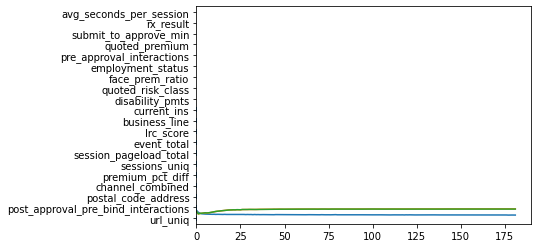

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report


# determine best accuracy for test set
preds = classifier.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = classifier.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")
print("TabNet Classifier report: \n\n", classification_report(y_test, preds))

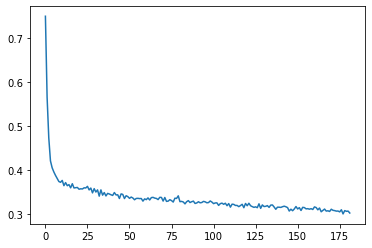

In [75]:
# plot losses
print(plt.plot(classifier.history['loss']))

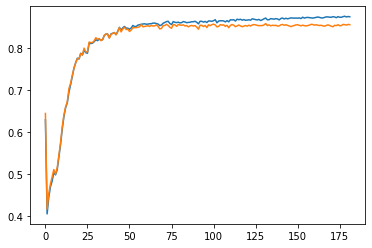

In [76]:
# plot accuracy
plt.plot(classifier.history['train_accuracy'])
plt.plot(classifier.history['valid_accuracy'])

<AxesSubplot:>

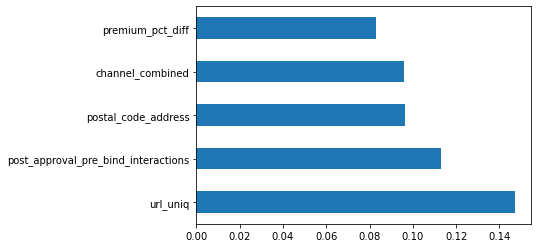

In [77]:
# find and plot feature importance
y_pred = classifier.predict(x_test)
classifier.feature_importances_
feat_importances = pd.Series(classifier.feature_importances_, index = feat.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [55]:
from pytorch_tabnet.pretraining import TabNetPretrainer

# TabNetPretrainer
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    )

# fit the model
unsupervised_model_no_preproc.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=1000 , patience=50,
    batch_size=2560, virtual_batch_size=1280,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,

)

# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')


C:\Users\milan\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 381.80574| val_0_unsup_loss_numpy: 14019660800.0|  0:00:02s
epoch 1  | loss: 23353121.71809| val_0_unsup_loss_numpy: 774091264.0|  0:00:05s
epoch 2  | loss: 8.22167 | val_0_unsup_loss_numpy: 256220336.0|  0:00:07s
epoch 3  | loss: 2994982.26616| val_0_unsup_loss_numpy: 161929184.0|  0:00:09s
epoch 4  | loss: 636256.38854| val_0_unsup_loss_numpy: 23087774.0|  0:00:12s
epoch 5  | loss: 512596.14032| val_0_unsup_loss_numpy: 8746907.0|  0:00:14s
epoch 6  | loss: 240288.99134| val_0_unsup_loss_numpy: 18086070.0|  0:00:17s
epoch 7  | loss: 22567.3846| val_0_unsup_loss_numpy: 529364.625|  0:00:19s
epoch 8  | loss: 31844.78221| val_0_unsup_loss_numpy: 12473508.0|  0:00:22s
epoch 9  | loss: 2.37235 | val_0_unsup_loss_numpy: 100980304.0|  0:00:24s
epoch 10 | loss: 2356150.06259| val_0_unsup_loss_numpy: 14414213.0|  0:00:27s
epoch 11 | loss: 316427.86261| val_0_unsup_loss_numpy: 26014690.0|  0:00:29s
epoch 12 | loss: 30177.08387| val_0_unsup_loss_numpy: 18215378.0|  0:00:31s
epoc

C:\Users\milan\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at ./test_pretrain2.zip


C:\Users\milan\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [62]:
loaded_pretrain = TabNetPretrainer()
# loaded_pretrain.load_model('./test_pretrain2.zip')
classifier2 = loaded_pretrain.load_model('./test_pretrain2.zip')
classifier2
# classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])